# Cardiac agatston score computation

There are several variants of the metric. The code below computes metric slice by slice and reports total score.

Prerequisites:
- Install SegmentEditorExtraEffects extension
- Load CT data set
- Segment calcified regions using threshold effect
- Remove bones using Scissors effect
- Use Volume masking effect to blank out all voxels except the calcificaions in the selected vessel

In [58]:
sampleDataSceneFile = slicer.app.temporaryPath+'/CardiacAgatstonSegmented.mrb'
slicer.util.downloadFile('https://github.com/lassoan/SlicerNotebooks/raw/master/data/CardiacAgatstonSegmented.mrb', sampleDataSceneFile)
slicer.util.loadScene(sampleDataSceneFile)

Requested file has been found: C:/Users/msliv/AppData/Local/Temp/Slicer/CardiacAgatstonSegmented.mrb


## Original CT

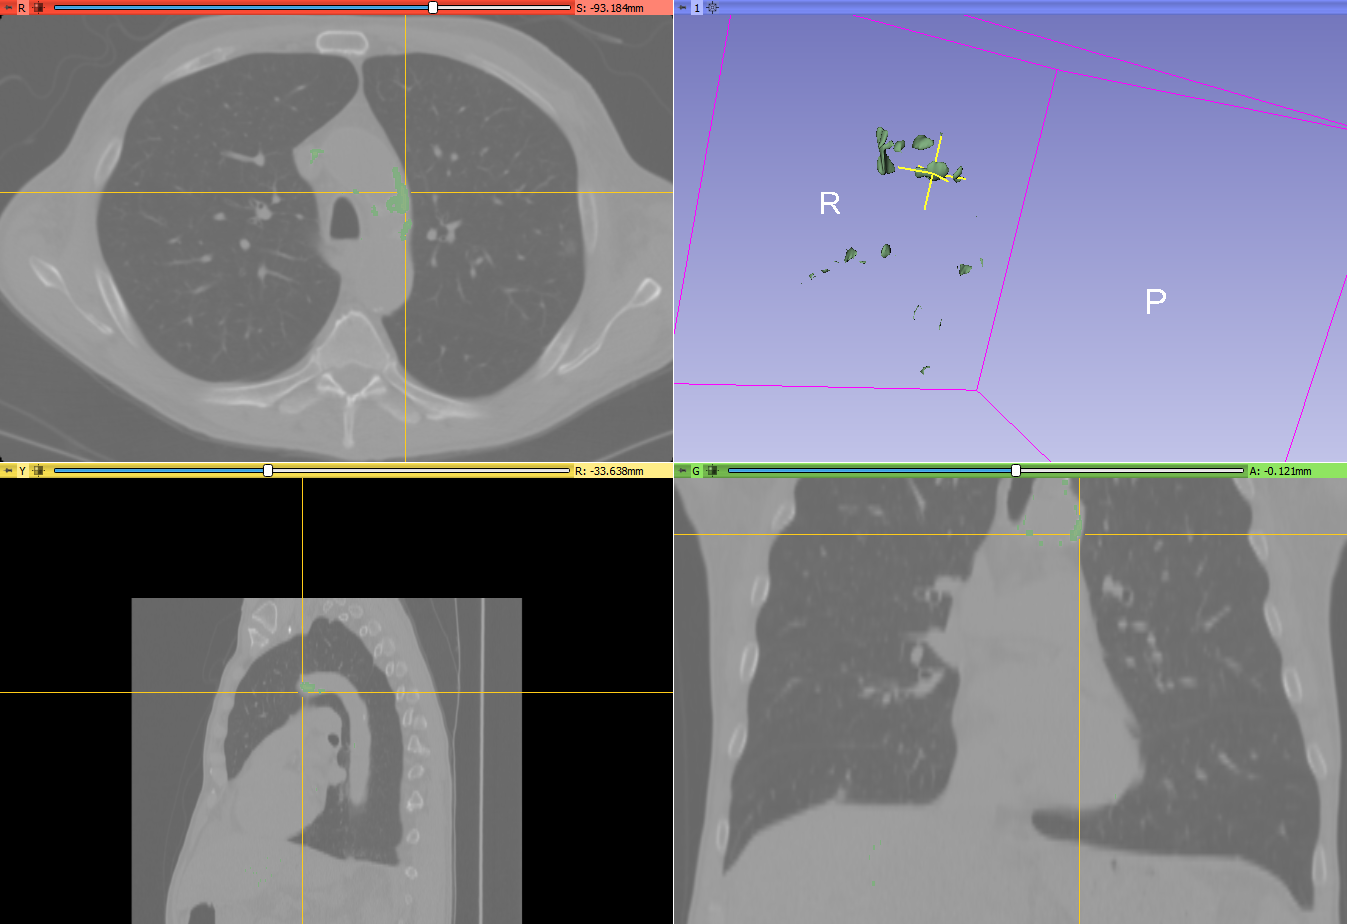

In [59]:
slicer.util.setSliceViewerLayers(background=getNode("CTChest"))
display()

## Thresholded CT
In this example, all high-intensity objects are included, therefore computed score will be extremely high

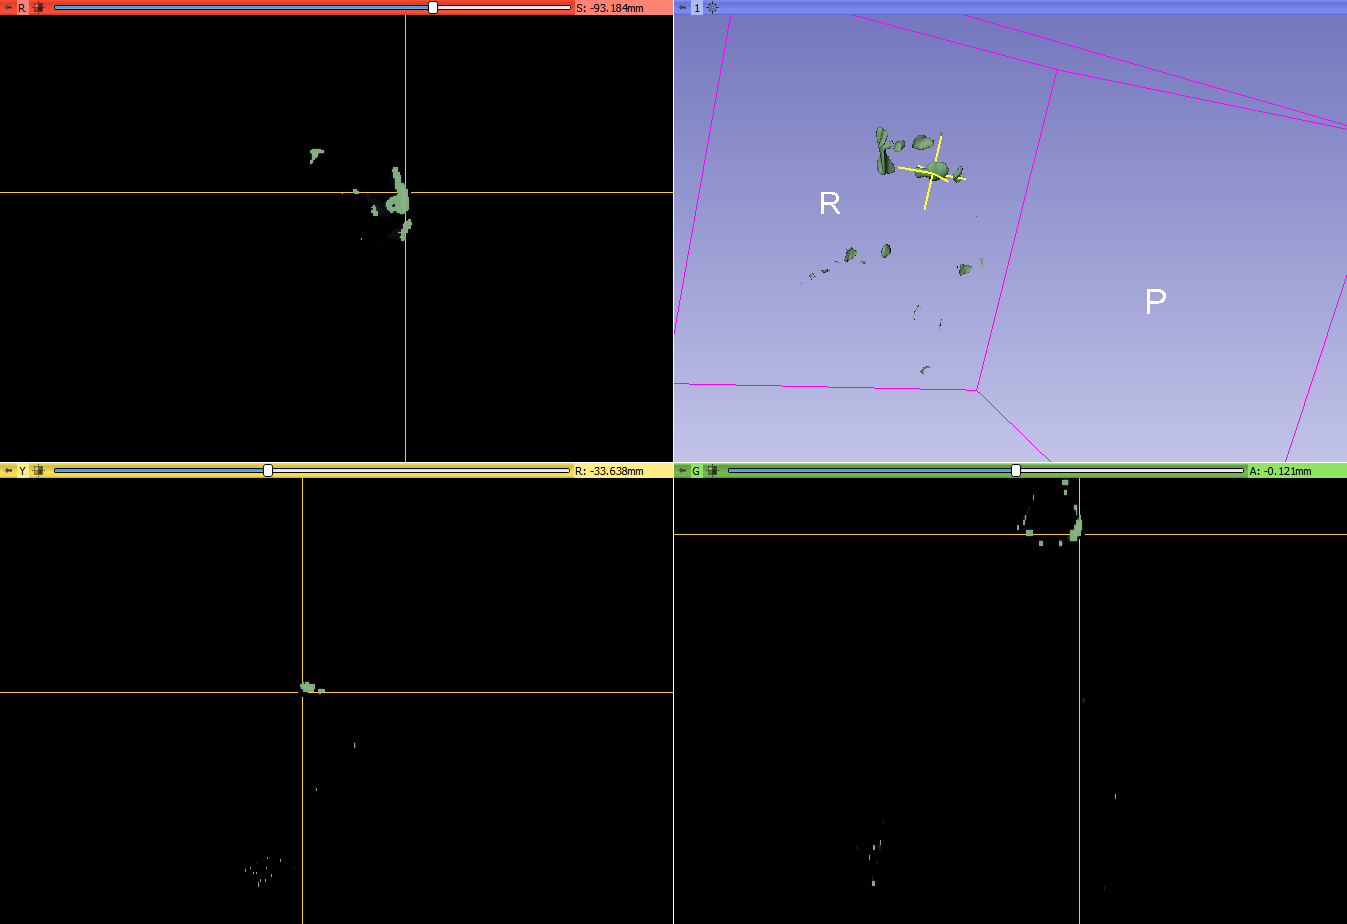

In [60]:
slicer.util.setSliceViewerLayers(background=getNode("CTChest masked"))
display()

## Set inputs

In [61]:
volumeNode = getNode("CTChest masked")
verbose = False # Set it to True to print score for each slice

## Compute score

In [62]:
import numpy as np
import math
voxelArray = slicer.util.arrayFromVolume(volumeNode)
areaOfPixelMm2 = volumeNode.GetSpacing()[0] * volumeNode.GetSpacing()[1]
numberOfSlices = voxelArray.shape[0]
totalScore = 0
if verbose:
        print("Slice scores:")
for sliceIndex in range(numberOfSlices):
    voxelArraySlice = voxelArray[sliceIndex]
    maxIntensity = voxelArraySlice.max()
    if maxIntensity < 100:
        continue
    weightFactor = math.floor(maxIntensity/100)
    indicesOfNonZeroVoxels = np.where(voxelArraySlice>100)
    numberOfNonZeroVoxels = len(indicesOfNonZeroVoxels[0])
    sliceScore = numberOfNonZeroVoxels * areaOfPixelMm2 * weightFactor
    totalScore += sliceScore
    if verbose:
        print("  Slice {0} score: {1} (weight factor: {2})".format(sliceIndex, sliceScore, weightFactor))
        slicer.app.processEvents()
print("Total Agatston score: {0}".format(totalScore))

Total Agatston score: 26805.9707601
